**Goal**: Try different image classifier models on the digits dataset from 
https://hastie.su.domains/ElemStatLearn/

**Results:**


*   KNN model: 94% accuracy
*   Linear regression: 87% accuracy
*   Neural network: 94% accuracy
*   Convolutional neural network: 96% accuracy

**Method:** We did not use cross validation, instead we do a quick hyperparameter tuning by hand. With more thorough search using cross validation, one could probably get slightly better precission.



Table of contents:
1. Data Loading
2. K Nearest neighbor
3. Linear regression
4. Neural Network (MLPClassifier)
5. Convolutional Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 1. Data Loading

In [2]:
train_path = '/content/zip.train.gz'
test_path = '/content/zip.test.gz'

In [3]:
train_data = pd.read_csv(train_path, names = range(257), compression='gzip', sep=' ')

test_data = pd.read_csv(test_path, names = range(257), compression='gzip', sep=' ')

In [4]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,NaN
5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN
4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN
7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.0,-1.0,-1.0,-1.0,-0.988,-0.527,-0.208,0.620,1.000,0.467,0.396,...,0.899,0.416,-0.510,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
3.0,-1.0,-1.0,-1.0,-0.990,0.708,0.557,0.347,-0.107,-0.758,-0.975,...,0.636,0.167,-0.968,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
3.0,-1.0,-1.0,-1.0,-0.783,-0.984,-0.827,0.068,1.000,1.000,1.000,...,1.000,1.000,0.727,-0.342,-0.933,-1.000,-1.000,-1.000,-1.0,NaN
0.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.549,0.463,0.999,0.999,0.999,...,0.621,0.999,-0.042,-0.231,-0.687,-1.000,-1.000,-1.000,-1.0,NaN


In [5]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,9,-1.0,-1.0,-1.0,-1.000,-1.000,-0.948,-0.561,0.148,0.384,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3,-1.0,-1.0,-1.0,-0.593,0.700,1.000,1.000,1.000,1.000,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.417,0.814,1.000,0.775,...,1.000,1.000,0.554,0.184,-0.484,-1.000,-1.0,-1.0,-1.0,-1.0
2003,9,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.855,0.209,0.941,...,-1.000,0.319,1.000,0.056,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2004,4,-1.0,-1.0,-1.0,-1.000,-0.031,0.752,-0.431,-1.000,-1.000,...,1.000,0.928,-0.393,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2005,0,-1.0,-1.0,-1.0,-1.000,-0.534,0.578,1.000,0.301,-0.328,...,1.000,0.430,0.200,-0.061,-0.975,-1.000,-1.0,-1.0,-1.0,-1.0


In [5]:
X_train=np.array(train_data[range(256)])
y_train=np.array(train_data.index)

y_test=np.array(test_data[0])
X_test=np.array(test_data[range(1,257)])

In [7]:
X_train

array([[-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , ..., -0.671, -0.828, -1.   ],
       [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       ...,
       [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]])

In [8]:
y_train

array([6., 5., 4., ..., 3., 0., 1.])

In [ ]:
#Reshape the image data into 16x16 format
X_train2d=X_train.reshape((y_train.size,16,16))
X_test2d=X_test.reshape((y_test.size,16,16))

Let us plot the first five images of the train dataset:

In [39]:
def plot_digit(d):
  plt.subplot(111)
  plt.imshow(np.abs(d.reshape(16,16)), cmap = 'gray')
  plt.xticks([]), plt.yticks([])
  plt.show()

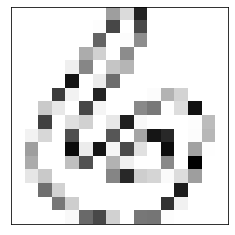

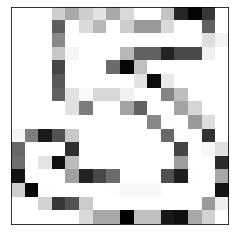

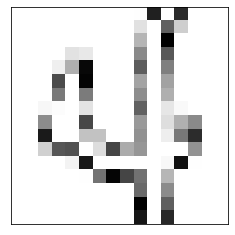

In [38]:
for i in range(3):
  plot_digit(X_train[i])


# 2. K Nearest Neighbors

In [9]:
from sklearn.neighbors import KNeighborsClassifier

ks = [1,3,4,5,7,10,15]
scores=[]
for k in ks:
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train, y_train)
  score = neigh.score(X_test, y_test)
  scores += [score]
  print("Accuracy for k = ", k, " is ", score)
scores = pd.DataFrame({'k': ks, 'score': scores})

Accuracy for k =  1  is  0.9436970602889886
Accuracy for k =  3  is  0.9446935724962631
Accuracy for k =  4  is  0.9431988041853513
Accuracy for k =  5  is  0.9446935724962631
Accuracy for k =  7  is  0.9417040358744395
Accuracy for k =  10  is  0.9357249626307922
Accuracy for k =  15  is  0.9302441454907823


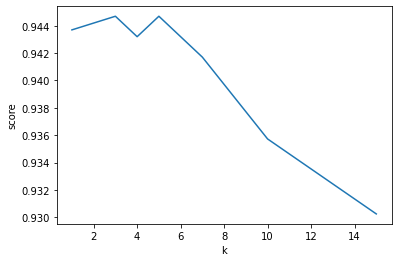

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data = scores, x = 'k', y = 'score')

In [11]:
neigh.predict(X_test)

array([9., 6., 3., ..., 4., 0., 1.])

In [12]:
y_test

array([9, 6, 3, ..., 4, 0, 1])

# 3. Linear regression

In [13]:
from sklearn.linear_model import RidgeClassifier

regression = RidgeClassifier(alpha = 150)

regression.fit(X_train, y_train)


print("Linear regression train accuracy:",regression.score(X_train, y_train))
print("Linear regression test accuracy:",regression.score(X_test, y_test))

Linear regression train accuracy: 0.919078315731724
Linear regression test accuracy: 0.874439461883408


In [14]:
regression.predict(X_test)

array([9., 6., 3., ..., 4., 0., 1.])

# 4. Neural network (MLPClassifier)



In [15]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(60, 60))

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.9417040358744395

In [16]:
clf.predict(X_test)

array([9., 6., 3., ..., 4., 0., 1.])

# 5. Convolutional neural network (Keras)

In [6]:
#Reshape the image data into 16x16 format
X_train2d=X_train.reshape((y_train.size,16,16))
X_test2d=X_test.reshape((y_test.size,16,16))

In [7]:

from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [83]:
model = Sequential()

model.add(Conv2D(32, (2,2), input_shape=(16,16,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.005)

model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [84]:
model.fit(X_train2d, y_train, batch_size=64, epochs=10)

Epoch 1/10
114/114 [==============================] - 2s 14ms/step - loss: 0.8084 - accuracy: 0.7331
Epoch 2/10
114/114 [==============================] - 2s 14ms/step - loss: 0.2987 - accuracy: 0.9092
Epoch 3/10
114/114 [==============================] - 2s 14ms/step - loss: 0.2086 - accuracy: 0.9317
Epoch 4/10
114/114 [==============================] - 2s 14ms/step - loss: 0.1692 - accuracy: 0.9480
Epoch 5/10
114/114 [==============================] - 2s 14ms/step - loss: 0.1499 - accuracy: 0.9502
Epoch 6/10
114/114 [==============================] - 2s 14ms/step - loss: 0.1378 - accuracy: 0.9554
Epoch 7/10
114/114 [==============================] - 2s 14ms/step - loss: 0.1199 - accuracy: 0.9616
Epoch 8/10
114/114 [==============================] - 2s 14ms/step - loss: 0.1050 - accuracy: 0.9652
Epoch 9/10
114/114 [==============================] - 2s 14ms/step - loss: 0.1028 - accuracy: 0.9657
Epoch 10/10
114/114 [==============================] - 2s 14ms/step - loss: 0.0968 - accura

In [85]:
model.evaluate(X_test2d, y_test)

63/63 [==============================] - 0s 4ms/step - loss: 0.1966 - accuracy: 0.9601


[0.196559876203537, 0.9601395130157471]